### K-meansによる減色処理 (Step.2) 減色処理

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

def k_means(img, Class=5):
    # get shape
    H,W,C = img.shape
    
    # initiate random seed
    np.random.seed(0)
    
    # reshape image
    img = np.reshape(img, (H*W, -1))
    
    # get index randomly
    i = np.random.choice(np.arange(H*W), Class, replace=False)
    # baseの５画素
    Cs = img[i].copy()
    
    while True:
        # prepare pixel class label
        clss = np.zeros((H*W), dtype=int)
        
        # each pixel
        for i in range(H*W):
            #get distance from index pixel
            dis = np.sqrt(np.sum((Cs-img[i])**2, axis=1))
            # get argmin distance
            clss[i] = np.argmin(dis)
            
        # selected pixel values
        Cs_tmp = np.zeros((Class, 3))  # 新しいbaseの５画素　必ずしもこの画素があるわけではない
        
        # earch class label
        for i in range(Class):
            Cs_tmp[i] = np.mean(img[clss==i], axis=0)
            
        # if　not any change
        if (Cs==Cs_tmp).all():
            break
        else:
            Cs = Cs_tmp.copy()
            
    # prepare out image
    out = np.zeros((H*W, 3), dtype=np.float32)
    
    # assign selected pixel values
    for i in range(Class):
        out[clss==i] = Cs[i]   #5画素のうちどれを採用するか
    
    print(Cs)
    
    out = np.clip(out, 0, 255)
    
    # reshape out image
    out = np.reshape(out, (H,W,3))
    out = out.astype(np.uint8)
    
    return out


        

[[182.90549199 156.39290618 181.05881007]
 [157.28413284 124.02829028 136.67742927]
 [228.36817227 201.7605042  211.80619748]
 [ 91.52492212  57.49260125  56.78660436]
 [121.73962704  88.02610723  96.16177156]]


True

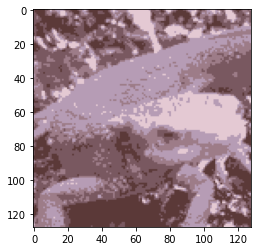

In [6]:
img = cv2.imread('../imori.jpg')

out = k_means(img)

plt.imshow(out)
cv2.imwrite('out92.jpg', out)

[[182.90549199 156.39290618 181.05881007]
 [157.28413284 124.02829028 136.67742927]
 [228.36817227 201.7605042  211.80619748]
 [ 91.52492212  57.49260125  56.78660436]
 [121.73962704  88.02610723  96.16177156]]


True

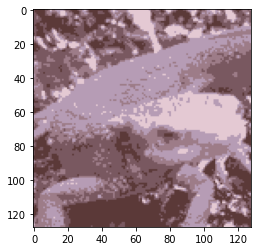

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def k_means(img, Class=5):
    # get shape
    H, W, C = img.shape

    # initiate random seed
    np.random.seed(0)

    # reshape image
    img = np.reshape(img, (H * W, -1))

    # get index randomly
    i = np.random.choice(np.arange(H * W), Class, replace=False)
    Cs = img[i].copy()

    while True:
        # prepare pixel class label
        clss = np.zeros((H * W), dtype=int)
        
        # each pixel
        for i in range(H * W):
            # get distance from index pixel
            dis = np.sqrt(np.sum((Cs - img[i])**2, axis=1))
            # get argmin distance
            clss[i] = np.argmin(dis)

        # selected pixel values
        Cs_tmp = np.zeros((Class, 3))
        
        # each class label
        for i in range(Class):
            Cs_tmp[i] = np.mean(img[clss == i], axis=0)

        # if not any change
        if (Cs == Cs_tmp).all():
            break
        else:
            Cs = Cs_tmp.copy()

    # prepare out image
    out = np.zeros((H * W, 3), dtype=np.float32)

    # assign selected pixel values  
    for i in range(Class):
        out[clss == i] = Cs[i]

    print(Cs)
        
    out = np.clip(out, 0, 255)

    # reshape out image
    out = np.reshape(out, (H, W, 3))
    out = out.astype(np.uint8)

    return out

# read image
img = cv2.imread('../imori.jpg')

out = k_means(img)

plt.imshow(out)
cv2.imwrite('out92.jpg', out)